# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc = requests.get(btc_url).json()
btc_price = btc['data']['1']['quotes']['CAD']['price']
# Fetch current ETH price
eth = requests.get(eth_url).json()
eth_price = eth['data']['1027']['quotes']['CAD']['price']
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $29028.37
The current value of your 5.3 ETH is $4008.92


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp('2020/11/30', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today
).df


# Preview DataFrame
df_ticker.head()

AGG                                     SPY  \
                             open    high     low  close   volume    open   
time                                                                        
2020-11-30 00:00:00-05:00  118.32  118.45  118.25  118.4  5231566  362.83   

                                                           
                             high     low close    volume  
time                                                       
2020-11-30 00:00:00-05:00  363.12  359.17   362  67154075

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker['AGG']['close'])
spy_close_price = float(df_ticker['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.4
Current SPY closing price: $362.0


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18100.00
The current value of your 200 AGG shares is $23680.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
inv_value = {'amount': [my_btc_value + my_eth_value, my_spy_value + my_agg_value] }
inv_class = ['crypto', 'shares']
df_savings = pd.DataFrame(inv_value, index=inv_class)
# Display savings DataFrame
display(df_savings)

,amount
crypto,33037.289008
shares,41780.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

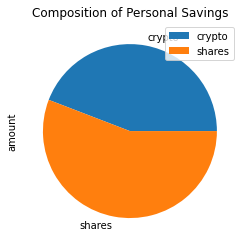

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title ='Composition of Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_btc_value + my_eth_value + my_spy_value + my_agg_value

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print('Congratulations! You have reached your financial goal.')
elif total_savings < emergency_fund:
    print(f'You are still ${emergency_fund - total_savings} away from your financial goal.')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-11-30', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-11-30', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2015-11-30 00:00:00-05:00  108.83  108.8700  108.77  108.80  1797166  209.75   
2015-12-01 00:00:00-05:00  108.54  108.8400  108.43  108.84  4094809  209.44   
2015-12-02 00:00:00-05:00  108.73  108.7799  108.61  108.69  2310790  210.61   
2015-12-03 00:00:00-05:00  108.41  108.4100  107.81  107.89  4334029  208.83   
2015-12-04 00:00:00-05:00  108.05  108.3000  108.00  108.24  2058997  206.08   

                                                                
                             high       low   close     volume  
time                                                            
2015-11-30 00:00:00-05:00  209.89  208.5600  208.67   78967202  
2015-12-01 00:00:00-05:00  210.82  209.1100  210.74   80426519  
2015-12-02 00:00:00-05:00  211.00  208.2300  208.50   88408000  
2015-12-03 00:00:00-05:00  209.15  204.7511  205.60  125709867  
2015-12-04 00:00:00-05:00  209.97  205.9300  209.63  138261490

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
time                                                                   
2015-11-30 00:00:00-05:00  108.83  108.8700  108.77  108.80  1797166   
2015-12-01 00:00:00-05:00  108.54  108.8400  108.43  108.84  4094809   
2015-12-02 00:00:00-05:00  108.73  108.7799  108.61  108.69  2310790   
2015-12-03 00:00:00-05:00  108.41  108.4100  107.81  107.89  4334029   
2015-12-04 00:00:00-05:00  108.05  108.3000  108.00  108.24  2058997   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2015-11-30 00:00:00-05:00          NaN  209.75  209.89  208.5600  208.67   
2015-12-01 00:00:00-05:00     0.000368  209.44  210.82  209.1100  210.74   
2015-12-02 00:00:00-05:00    -0.001378  210.61  211.00  208.2300  208.50   
2015-12-03 00:00:00-05:00    -0.007360  208.83  209.15  204.7511  205.60   
2015-12-04 00:00:00-05:00     0.003244  206.08  209.97  205.9300  209.63   

                                                   
                              volume daily_return  
time                                               
2015-11-30 00:00:00-05:00   78967202          NaN  
2015-12-01 00:00:00-05:00   80426519     0.009920  
2015-12-02 00:00:00-05:00   88408000    -0.010629  
2015-12-03 00:00:00-05:00  125709867    -0.013909  
2015-12-04 00:00:00-05:00  138261490     0.019601

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999374,0.989478,0.996163,0.991391,1.001696,1.009341,0.997227,1.001431,1.000470,1.001072,...,0.993636,1.003084,1.003498,1.007426,0.999897,0.993770,0.996592,0.995372,1.002637,1.001941
2,0.992227,0.977955,0.998625,0.984188,0.990773,1.010099,1.004586,0.999880,1.010976,0.989861,...,0.989121,0.991132,0.988850,1.006963,0.990804,0.987235,0.998114,0.998205,1.002420,0.998293
3,0.980670,0.972350,0.984183,0.975396,0.995436,1.007980,1.009394,0.992592,1.016236,0.989467,...,0.990805,0.989332,0.982863,1.001679,0.991997,0.992689,0.997664,0.997165,1.004268,1.003559
4,0.973005,0.964235,0.976343,0.972830,0.985915,0.999755,1.007233,1.000161,1.020102,0.979990,...,0.983012,0.988957,0.980483,1.006296,1.003477,0.990652,1.006551,0.995784,1.012748,1.002639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.669686,21.252705,7.605784,13.320250,14.363279,15.419500,14.338081,12.740988,7.388358,29.760823,...,5.662222,8.242970,9.434545,21.980063,10.545178,8.092504,8.822460,19.739213,15.744495,7.553832
7557,3.707612,21.225095,7.588791,13.316347,14.271990,15.265988,14.337482,12.645504,7.440318,30.031563,...,5.674317,8.301163,9.529871,21.809181,10.632504,8.154172,8.784356,19.527092,15.698575,7.445367
7558,3.679671,21.359595,7.586569,13.252797,14.215830,15.174663,14.415973,12.645179,7.448331,29.806419,...,5.618745,8.245499,9.568975,21.586961,10.542970,8.201702,8.908799,19.394805,16.039681,7.441181
7559,3.676669,21.729386,7.629208,13.250592,14.129007,15.150440,14.350694,12.581457,7.430887,29.834378,...,5.588785,8.323560,9.651236,21.795734,10.456503,8.258711,9.013659,19.485706,16.122782,7.446706


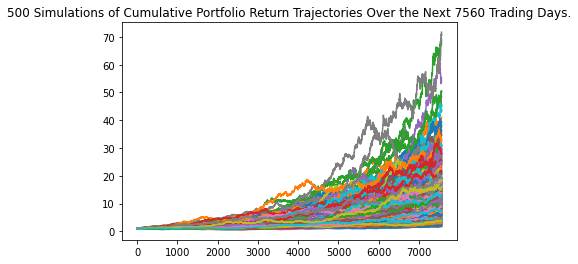

In [19]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

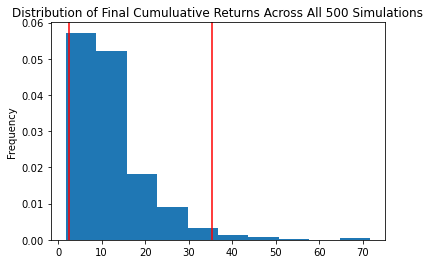

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             12.485306
std               8.970355
min               1.764868
25%               6.923315
50%              10.118289
75%              15.237895
max              71.688262
95% CI Lower      2.598629
95% CI Upper     35.359536
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $51972.58 and $707190.72


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [24]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $77958.87 and $1060786.08


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [25]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [26]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5yr_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989211,0.989880,0.999615,1.003601,0.992923,0.995951,1.012074,1.003485,1.002160,1.002371,...,0.991092,0.996429,0.997453,1.007615,0.999399,0.983623,1.014378,1.006793,0.991866,1.000447
2,0.999285,0.995486,0.997279,1.003176,0.998184,0.994709,1.015460,1.004914,0.996610,1.007604,...,0.987936,0.990193,1.009084,1.023311,1.008721,0.994109,1.021993,1.007448,0.981701,1.000911
3,1.005734,0.989090,0.986654,1.002302,0.990168,0.990856,1.032113,1.012851,0.999821,1.004274,...,0.984683,0.990201,1.009205,1.010271,1.022072,0.993134,1.013745,1.010615,0.992580,1.004625
4,1.010559,0.993525,0.977268,1.002615,0.984517,0.998928,1.040977,1.013707,1.015607,1.008683,...,0.993602,0.990024,1.002687,1.020080,1.011787,0.994277,1.013154,1.003531,1.003545,1.005293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.185535,1.541381,1.477912,2.321250,1.705926,2.180839,2.331398,1.538193,1.132930,0.878830,...,1.547952,1.593588,1.697561,1.524747,2.081699,1.951758,1.365783,1.555387,1.705912,2.039857
1257,3.219439,1.530433,1.474600,2.307946,1.703008,2.176068,2.320521,1.531370,1.138138,0.876625,...,1.545055,1.578226,1.693313,1.526930,2.069831,1.955516,1.352008,1.573868,1.679183,2.049745
1258,3.235371,1.536213,1.472451,2.289377,1.700762,2.175619,2.339501,1.531506,1.137053,0.890215,...,1.553905,1.590118,1.693482,1.536538,2.045850,1.972328,1.355000,1.572577,1.690102,2.025719
1259,3.225231,1.542787,1.483377,2.284304,1.704997,2.188731,2.375236,1.545505,1.133173,0.886851,...,1.540258,1.588641,1.681038,1.534413,2.046801,1.976029,1.346205,1.571066,1.692371,2.045541


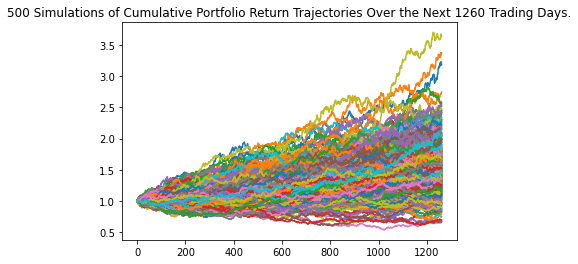

In [27]:
# Plot simulation outcomes
line_plot_5yr = MC_5yr_dist.plot_simulation()

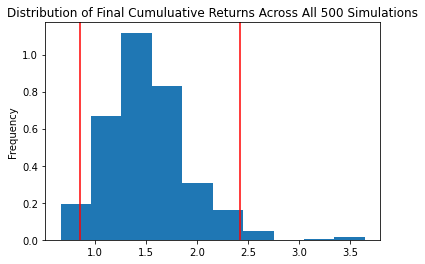

In [28]:
# Plot probability distribution and confidence intervals
dist_plot_5yr = MC_5yr_dist.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5yr = MC_5yr_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl_5yr)

count           500.000000
mean              1.509860
std               0.400473
min               0.658509
25%               1.247799
50%               1.456362
75%               1.724829
max               3.646376
95% CI Lower      0.852888
95% CI Upper      2.419642
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5yr[8]*60000,2)
ci_upper_five = round(tbl_5yr[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51173.3 and $145178.5


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.4, 0.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10yr_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005915,0.989863,0.988862,1.003379,0.987906,1.001420,1.003729,1.003311,0.998568,1.002694,...,1.004270,1.004414,0.994274,0.996438,0.997943,1.005911,1.000949,1.001872,1.005114,0.992263
2,1.005358,0.997499,0.995909,0.998103,0.982147,1.005559,1.012214,1.016754,1.002867,1.008878,...,1.000217,0.996036,0.993016,0.996788,0.991949,1.005364,0.990298,1.000911,1.005210,0.989737
3,0.999128,1.010033,1.000678,0.996570,0.971500,0.999301,1.004370,1.009613,1.006008,1.012916,...,1.010350,0.985264,0.998909,1.004981,0.981764,1.015641,0.997910,1.016435,0.999859,0.983397
4,1.001928,1.012571,1.008887,0.989062,0.976598,0.987846,0.997585,0.989195,1.000026,1.010894,...,1.022973,0.982309,1.002791,1.003389,0.972699,1.029171,0.993431,1.006889,1.010692,0.981734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.413619,2.438563,3.397599,1.806055,0.947991,4.502768,2.047569,2.208920,1.608335,1.716633,...,2.887365,1.807975,1.942137,1.605974,1.865407,2.286944,1.420524,6.480395,1.549361,2.951655
2517,2.428809,2.423774,3.387323,1.811511,0.946721,4.478258,2.045222,2.233017,1.585368,1.718130,...,2.900374,1.811732,1.946499,1.606483,1.860325,2.287157,1.419234,6.531486,1.564852,2.967654
2518,2.404205,2.419873,3.371792,1.806787,0.949643,4.414236,2.075721,2.233912,1.588294,1.737567,...,2.890802,1.824517,1.926511,1.606710,1.844633,2.298323,1.423302,6.432327,1.563283,2.967649
2519,2.396727,2.408977,3.362811,1.814123,0.949412,4.358975,2.069012,2.269855,1.583198,1.738712,...,2.885746,1.845602,1.919539,1.606797,1.833009,2.282218,1.422162,6.415309,1.577499,3.001960


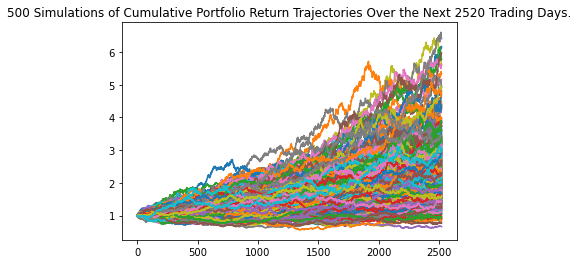

In [34]:
# Plot simulation outcomes
line_plot_10yr = MC_10yr_dist.plot_simulation()

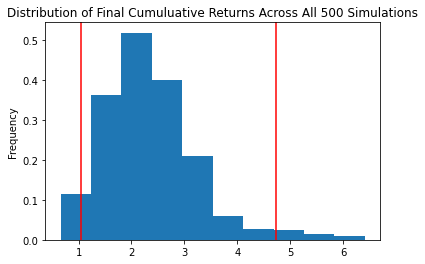

In [35]:
# Plot probability distribution and confidence intervals
dist_plot_10yr = MC_10yr_dist.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10yr = MC_10yr_dist.summarize_cumulative_return()

# Print summary statistics
print(tbl_10yr)

count           500.000000
mean              2.353746
std               0.891920
min               0.658900
25%               1.747468
50%               2.254411
75%               2.815262
max               6.411880
95% CI Lower      1.042361
95% CI Upper      4.725753
Name: 2520, dtype: float64


In [38]:
# Set initial investment
initial_investment_ten = 30000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10yr[8]*30000,2)
ci_upper_ten = round(tbl_10yr[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000 in the portfolio over the next 10 years will end within in the range of $31270.82 and $141772.6
